In [175]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [176]:
x_train_air = pd.read_csv('Train_air.csv')

In [177]:
x_train_air.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [178]:
x_train = x_train_air.values

In [179]:
x_train.shape

(1600, 6)

In [180]:
y = x_train[:,-1]

In [181]:
print(type(y))

<class 'numpy.ndarray'>


In [182]:
print(y)

[ -82.15466656  -48.89796018   77.2703707  ... -107.51050797  -47.34155781
 -115.93900296]


In [183]:
x = x_train[:,:5]

In [184]:
x.shape

(1600, 5)

In [185]:
print(x)

[[ 0.29341624 -0.94559871 -0.42110515  0.40681602  0.52566183]
 [-0.83608408 -0.18922804 -0.77640262 -1.05383124  0.59799685]
 [ 0.23642511  0.13283602 -0.14772298  0.69985396 -0.18736416]
 ...
 [ 1.04417694 -0.89920649  1.73039905 -1.87105676  0.44251965]
 [-1.2691729  -0.00505216  1.85766873 -1.08036482  0.73633394]
 [-1.88400025 -0.84942743 -1.45227035  0.48861308  1.4595758 ]]


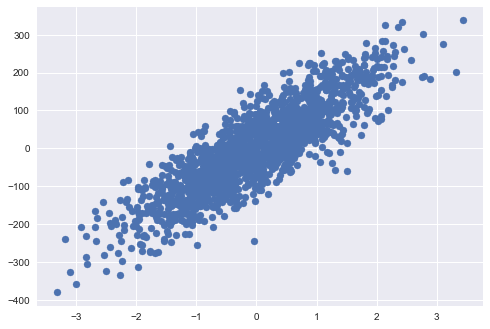

In [186]:
plt.style.use('seaborn')
plt.scatter(x[:,1],y)
plt.show()

In [187]:
ones = np.ones((x.shape[0],1))
x = np.hstack((ones,x))
print(x.shape)

(1600, 6)


In [188]:
m = x.shape[0]
print(x.shape)

(1600, 6)


In [189]:
def hypothesis(x,theta):
    return np.dot(x,theta)

def error(x,y,theta):
    e = 0.0
    y_ = hypothesis(x,theta)
    e = np.sum((y-y_)**2)
    
    return e/m
    
def gradient(x,y,theta):
    
    y_ = hypothesis(x,theta)
    grad = np.dot(x.T,(y_ - y))
    m = x.shape[0]
    return grad/m

def gradient_descent(x,y,learning_rate = 0.1,max_iters=300):
    
    n = x.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(x,y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(x,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list

In [190]:
theta,error_list = gradient_descent(x,y)

In [191]:
theta

array([ 4.99096674, 29.68187118, 92.66247759,  8.28062089, 44.76773522,
        2.51916121])

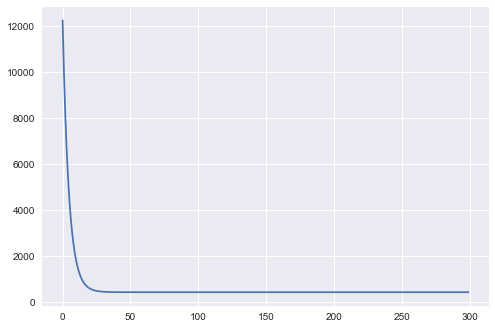

In [192]:
plt.plot(error_list)
plt.show()

In [193]:
X_test = pd.read_csv('Test_air.csv').values

In [194]:
X_test.shape

(400, 5)

In [195]:
p = X_test.shape[0]

In [196]:
print(p)

400


In [197]:
onesi = np.ones((X_test.shape[0],1))
X_test = np.hstack((onesi,X_test))
print(X_test.shape)

(400, 6)


In [198]:
y_test = hypothesis(X_test,theta)

In [199]:
y_test.shape

(400,)

In [200]:
idi = np.arange(0,400,1)

In [201]:
data = {
    "id":idi,
    "target":y_test
}

In [202]:
df = pd.DataFrame(data)

In [203]:
df.head()

,id,target
0,0,114.583689
1,1,118.012815
2,2,-21.739852
3,3,-43.936899
4,4,-95.914898


In [204]:
df.to_csv('y_prediction_air.csv',index=False)